<a href="https://colab.research.google.com/github/tontantip/DADS7102_Applied_Optimization-Predictive_Analytics/blob/main/Code_HW3_Opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework3

นาย ต้นตาล ทิพย์คุณ 6720422016



In [ ]:
# AMPL Python API
%pip install -q amplpy

In [ ]:
from amplpy import AMPL, ampl_notebook

ampl = ampl_notebook(
    modules=["coin", "highs", "gokestrel", "gurobi"],  # modules to install
    license_uuid="your-license-uuid",  # license to use
)  # instantiate AMPL object and register magics

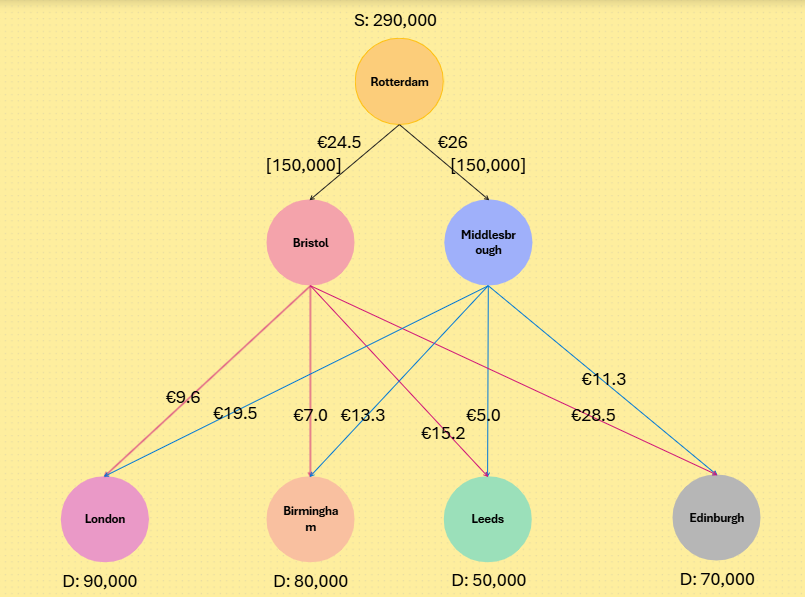

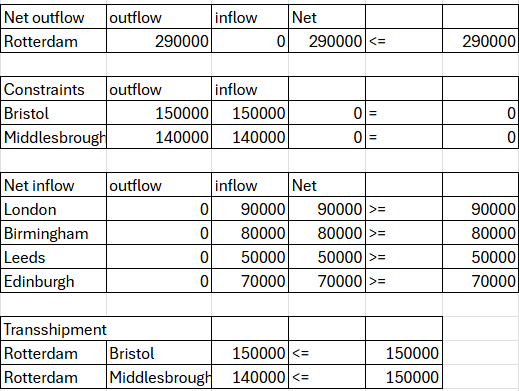

In [ ]:
# NLP: Chance constraint

%%ampl_eval


reset;
var x12 >= 0;
var x13 >= 0;
var x24 >= 0;
var x25 >= 0;
var x26 >= 0;
var x27 >= 0;
var x34 >= 0;
var x35 >= 0;
var x36 >= 0;
var x37 >= 0;

minimize objective: 24.5*x12+26*x13+9.6*x24+7*x25+15.2*x26+28.5*x27+19.5*x34+13.3*x35+5*x36+11.3*x37;

s.t. c1: x12 <= 150000;
s.t. c2: x13 <= 150000;
s.t. c3: x12 + x13 <= 290000;
s.t. c4: (x12) - (x24 + x25 + x26 + x27) = 0;
s.t. c5: (x13) - (x34 + x35 + x36 + x37) = 0;
s.t. c6: x24 + x34 >= 90000;
s.t. c7: x25 + x35 >= 80000;
s.t. c8: x26 + x36 >= 50000;
s.t. c9: x27 + x37 >= 70000;

Solving minimum cost network flow.

In [ ]:
ampl.option["solver"] = "gurobi"
ampl.solve()
ampl.get_data("x12", "x13", "x24", "x25", "x26", "x27", "x34", "x35", "x36", "x37").to_pandas()